<a href="https://colab.research.google.com/github/Bhavani-Rajan/DS-Unit-2-Applied-Modeling/blob/master/module2/assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

#### Load the data

In [22]:
!pip install category_encoders==2.*
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
col_headers = ['class','cap-shape','cap-surface','cap-color',
               'bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root',
              'stalk-surface-above-ring','stalk-surface-below-ring',
              'stalk-color-above-ring','stalk-color-below-ring',
              'veil-type','veil-color','ring-number','ring-type',
              'spore-print-color','population','habitat']

df = pd.read_csv(data_url,names=col_headers)

In [81]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [82]:
df.describe(exclude='number').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


#### Split data into train and test

stratify specifies target columns 

In [0]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2, random_state=45, stratify=df['class'])

In [84]:
train.shape ,test.shape

((6499, 23), (1625, 23))

#### Split train into train and validation

In [0]:
train, val = train_test_split(train, test_size=0.2, random_state=45, stratify=train['class'])

In [86]:
train.shape ,val.shape

((5199, 23), (1300, 23))

#### clean up the data

In [0]:
def wrangle(X):
#   class_map = {'p': 0, 'e': 1}
#   bruises = {'t':1,'f':0 }
#   X['class'] = X['class'].map(class_map)
#   X['bruises'] = X['bruises'].map(bruises)

  X.replace('?',np.nan)
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)


In [88]:
train.shape , val.shape, test.shape

((5199, 23), (1300, 23), (1625, 23))

In [89]:
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [90]:
train.describe(exclude='number').T

,count,unique,top,freq
class,5199,2,e,2693
cap-shape,5199,6,x,2331
cap-surface,5199,4,y,2076
cap-color,5199,10,n,1463
bruises,5199,2,f,3065
odor,5199,9,n,2272
gill-attachment,5199,2,f,5065
gill-spacing,5199,2,c,4351
gill-size,5199,2,b,3576
gill-color,5199,12,b,1111


#### Arrange data into X features matrix and y target vector

In [0]:
target = 'class'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]


In [97]:
X_train.shape,X_val.shape

((5199, 22), (1300, 22))

In [92]:
X_val.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [66]:
y_val.shape

(1300,)

### baseline accuracy

In [94]:
y = df['class'] == 'e'
X = df.drop(columns='class')
y.value_counts(normalize=True)

True     0.517971
False    0.482029
Name: class, dtype: float64

In [95]:
y.value_counts()

True     4208
False    3916
Name: class, dtype: int64

#### randomforestclassifier model

In [99]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  SimpleImputer(),
  RandomForestClassifier(n_estimators=100,random_state=45,n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


#### Default feature importance

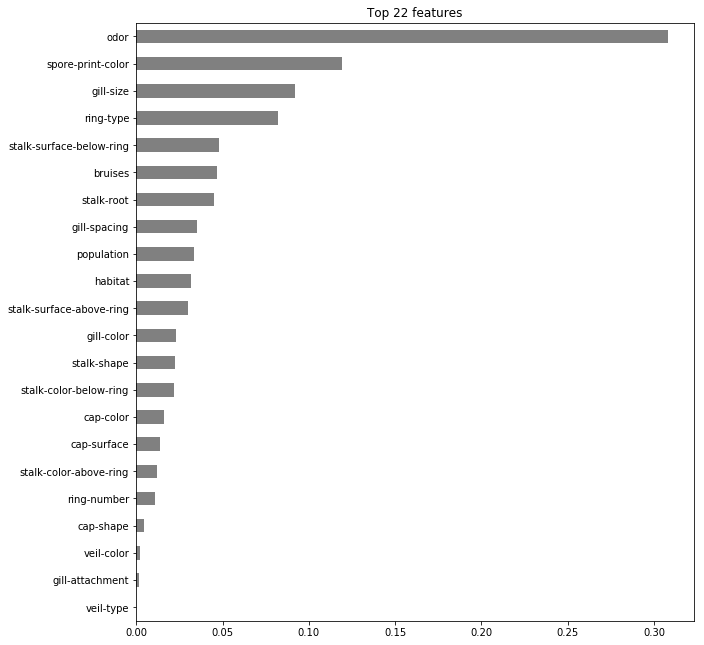

In [74]:
# Get feature importances
rf = pipeline_rf.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 22
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

#### Drop-column of importance

In [75]:
column = 'odor'

pipeline_rf = make_pipeline(
  ce.OrdinalEncoder(),
  SimpleImputer(strategy='median'),
  RandomForestClassifier(n_estimators=100,random_state=45,n_jobs=-1)
)

pipeline_rf.fit(X_train.drop(columns=column),y_train)
score_without = pipeline_rf.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

Validation Accuracy without odor: 1.0
